In [1]:
import numpy as np

def detect_outliers(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_box_hist(data):
    mean = np.mean(data)
    variance = np.var(data)
    stddev = np.std(data)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Box Plot
    ax1.boxplot(data)
    ax1.set_title('Box Plot')
    
    # Histogram
    ax2.hist(data, bins=10, color='blue')
    ax2.axvline(mean, color='red', label='Mean')
    ax2.axvline(mean + stddev, color='green', linestyle='--', label='+1 Std Dev')
    ax2.axvline(mean - stddev, color='green', linestyle='--', label='-1 Std Dev')
    ax2.legend()
    ax2.set_title('Histogram')
    
    plt.show()
    data=[15,54,65,45,25,10,25,45,98,97]
    plot_box_hist(data)

Original Data:
Mean: 14.0
Variance: 204.66666666666666
Std Dev: 14.30617582258329


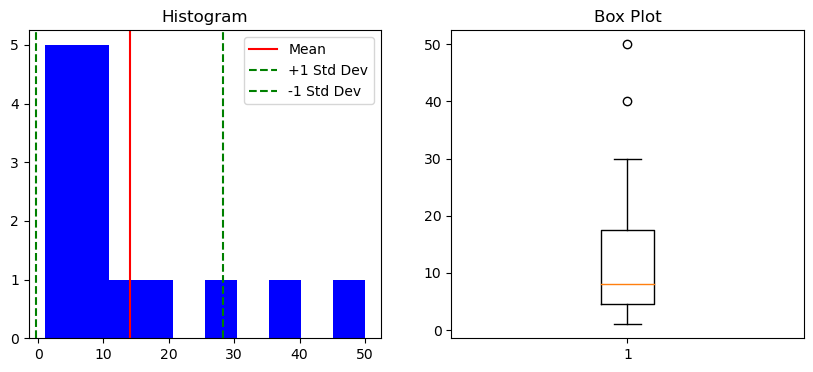


Data after logarithmic transformation:
Mean: 2.1206863259290634
Variance: 1.1318955606609837
Std Dev: 1.0639058044117362


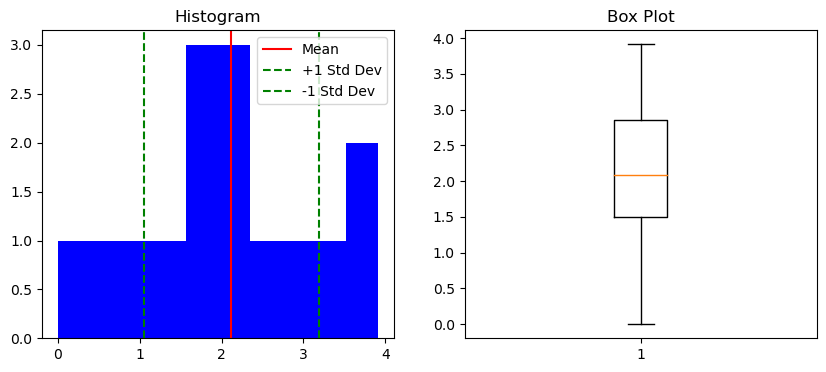

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_distributions(data, transform=None):
    # Apply data transformation, if specified
    if transform:
        data = transform(data)
        
    mean = np.mean(data)
    variance = np.var(data)
    stddev = np.std(data)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Histogram
    ax1.hist(data, bins=10, color='blue')
    ax1.axvline(mean, color='red', label='Mean')
    ax1.axvline(mean + stddev, color='green', linestyle='--', label='+1 Std Dev')
    ax1.axvline(mean - stddev, color='green', linestyle='--', label='-1 Std Dev')
    ax1.legend()
    ax1.set_title('Histogram')
    
    # Box Plot
    ax2.boxplot(data)
    ax2.set_title('Box Plot')
    
    plt.show()
# Originaldata with skewed distribution
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]
print("Original Data:")
print("Mean:", np.mean(data))
print("Variance:", np.var(data))
print("Std Dev:", np.std(data))
plot_distributions(data)

# Data after taking the logarithm
log_data = np.log(data)
print("\nData after logarithmic transformation:")
print("Mean:", np.mean(log_data))
print("Variance:", np.var(log_data))
print("Std Dev:", np.std(log_data))
plot_distributions(data, np.log)


Normal Distribution:
Mean: 0.15598113359897622
Std Dev: 0.9596161253972378
Skewness: 0.1523188908359179
Kurtosis: 0.06180736589240077


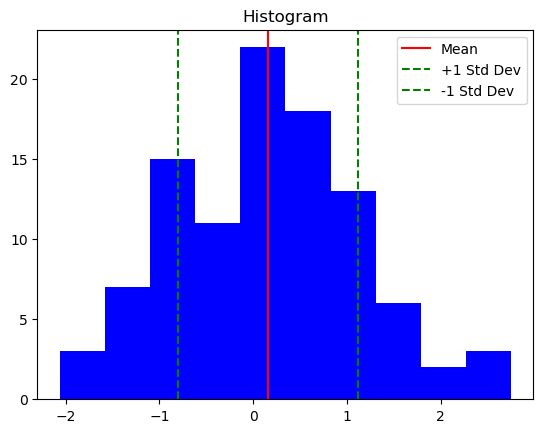


Skewed Distribution:
Mean: 5.10937076699625
Std Dev: 5.414971420237002
Skewness: -0.015179308266231865
Kurtosis: -1.8748428863501185


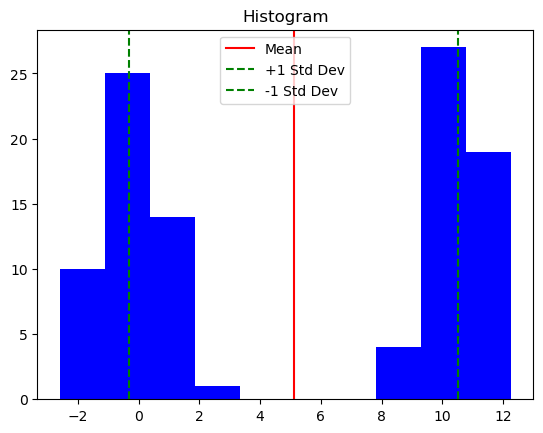

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

def plot_histogram(data):
    mean = np.mean(data)
    stddev = np.std(data)
    skewness = skew(data)
    kurt = kurtosis(data)
    
    fig, ax = plt.subplots()
    
    ax.hist(data, bins=10, color='blue')
    ax.axvline(mean, color='red', label='Mean')
    ax.axvline(mean + stddev, color='green', linestyle='--', label='+1 Std Dev')
    ax.axvline(mean - stddev, color='green', linestyle='--', label='-1 Std Dev')
    ax.legend()
    ax.set_title('Histogram')
    
    print("Mean:", mean)
    print("Std Dev:", stddev)
    print("Skewness:", skewness)
    print("Kurtosis:", kurt)
    
    plt.show()
# Normal distribution
normal_data = np.random.normal(size=100)
print("Normal Distribution:")
plot_histogram(normal_data)

# Skewed distribution
skewed_data = np.concatenate([np.random.normal(size=50), np.random.normal(loc=10, size=50)])
print("\nSkewed Distribution:")
plot_histogram(skewed_data)



In [5]:
import numpy as np

# Define the sample data
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calculate the mean, variance, and standard deviation of the sample
sample_mean = np.mean(data)
sample_var = np.var(data, ddof=1) # specify ddof=1 to use sample variance instead of population variance
sample_std = np.std(data, ddof=1)

# Calculate the mean and variance of the population using the sample mean and variance as an estimate
pop_mean = sample_mean
pop_var = sample_var * len(data) / (len(data) - 1) # multiply by len(data) / (len(data) - 1) to estimate the population variance from the sample variance

# Compare the sample and population variance
print("Sample variance:", sample_var)
print("Population variance:", pop_var)

Sample variance: 9.166666666666666
Population variance: 10.185185185185183
